In [31]:
library(survival)

In [32]:
data(rats)

Warning message in data(rats):
"data set 'rats' not found"

In [33]:
rats

litter,rx,time,status,sex
1,1,101,0,f
1,0,49,1,f
1,0,104,0,f
2,1,91,0,m
2,0,104,0,m
2,0,102,0,m
3,1,104,0,f
3,0,102,0,f
3,0,104,0,f
4,1,91,0,m


**Objeto sur.**

In [34]:
rp<-Surv(rats$time, rats$status)
rp

  [1] 101+  49  104+  91+ 104+ 102+ 104+ 102+ 104+  91+ 104+ 102+ 104+ 104+ 104+
 [16]  98+  62+  77+  77+  97+  79+  91+  98+  76+  89+ 104+ 104+ 104+ 104+  98+
 [31]  88   96  104+  96+  71+  91+ 104   94+  77   79+ 104+  99+  96  104+ 104+
 [46]  61+  88+  85+  82+  77+ 104+  63+ 104+ 102+  70  104+  77+ 104+ 104+ 102+
 [61]  89   91+  90+ 104+  80+  92+  91+  70+  92+ 104+ 104+ 101+  39   45+  50 
 [76] 104+  53+ 102+ 103   69+  91+  65+ 104+  91+  93+ 104+ 103+  86+ 104+  75+
 [91]  85+  72+ 104+ 104+ 100+ 102+ 104+  63+ 104+  95+ 104+  95+ 104+ 104+  74+
[106] 104+ 104+ 102+  81+ 104+  69+ 104+  93+  80+  67  104+  68   92+  98+  83+
[121] 104+ 104+ 104+ 104+  89+  89+ 104+ 104+ 104+  63+  32+  51+ 104+  83+  40 
[136] 104+  98+  78+  87+ 104+ 104+ 104+ 104+ 102+ 104+ 104+ 104+  87+ 104+  94+
[151]  89+ 104+ 104+ 104+ 104+ 102+  78+ 104+ 104+ 104+  91+ 102+ 104+  81   64 
[166]  90+ 104+  55+  86   55   94+  91+ 104+ 102+  34  104+  54  104+ 104+ 102+
[181]  76+  87+  74+  23+ 10

**H0:** ninguna variable es importe en el modelo.

**Ha:** Al menos una es significativa

In [35]:
cox.rats<-coxph(rp~rats$litter+rats$rx+rats$sex)
cox.rats

Call:
coxph(formula = rp ~ rats$litter + rats$rx + rats$sex)

                 coef exp(coef)  se(coef)      z        p
rats$litter  0.008465  1.008501  0.005344  1.584  0.11315
rats$rx      0.805296  2.237359  0.309431  2.603  0.00925
rats$sexm   -3.085125  0.045724  0.724932 -4.256 2.08e-05

Likelihood ratio test=52.58  on 3 df, p=2.252e-11
n= 300, number of events= 42 

Este me va a servir para ver que variables son las que influyen. Permite ver los riesgos proporcionales

In [36]:
summary(cox.rats)

Call:
coxph(formula = rp ~ rats$litter + rats$rx + rats$sex)

  n= 300, number of events= 42 

                 coef exp(coef)  se(coef)      z Pr(>|z|)    
rats$litter  0.008465  1.008501  0.005344  1.584  0.11315    
rats$rx      0.805296  2.237359  0.309431  2.603  0.00925 ** 
rats$sexm   -3.085125  0.045724  0.724932 -4.256 2.08e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            exp(coef) exp(-coef) lower .95 upper .95
rats$litter   1.00850     0.9916   0.99799    1.0191
rats$rx       2.23736     0.4470   1.21997    4.1032
rats$sexm     0.04572    21.8702   0.01104    0.1893

Concordance= 0.781  (se = 0.031 )
Likelihood ratio test= 52.58  on 3 df,   p=2e-11
Wald test            = 26.54  on 3 df,   p=7e-06
Score (logrank) test = 45.02  on 3 df,   p=9e-10


Prueba de hipótesis general, contrastes, es la prueba de significancia. Revisar si los coeficientes es 0 o no, para ver si al menos una esta influyendo. 

Hay tres contrastes, verosimilitud, Wald test y la prueba de puntajes . para ver si al menos una de las variables es importante, revisamos el p valor.

Se rechaza H0, por lo que al menos una es significativa.

z Pr(>|z|), muestra la significancia de cada una de las categorías.
exp(coef), en las categóricas muestra el riesgo que es mayor entre los grupos distintos de la categoría. Si es binaria, ver si son 0 y 1, o M y F, y el riesgo es comparable entre el numero de variables.

Las variables sexo y rx son significativas.

In [37]:
cox.rats2<-coxph(rp~rats$rx+rats$sex)
summary(cox.rats2)
#en rx no dice a que variable se refiere porque son 0 y 1

Call:
coxph(formula = rp ~ rats$rx + rats$sex)

  n= 300, number of events= 42 

              coef exp(coef) se(coef)      z Pr(>|z|)    
rats$rx    0.79100   2.20559  0.30936  2.557   0.0106 *  
rats$sexm -3.06769   0.04653  0.72480 -4.232 2.31e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          exp(coef) exp(-coef) lower .95 upper .95
rats$rx     2.20559     0.4534   1.20281    4.0444
rats$sexm   0.04653    21.4923   0.01124    0.1926

Concordance= 0.764  (se = 0.031 )
Likelihood ratio test= 50.04  on 2 df,   p=1e-11
Wald test            = 24.08  on 2 df,   p=6e-06
Score (logrank) test = 42.68  on 2 df,   p=5e-10


El tipo de sexo y tratamiento de la rata, afecta la supervivencia del animalito

In [38]:
sup<-survfit(cox.rats2)
sup

Call: survfit(formula = cox.rats2)

      n  events  median 0.95LCL 0.95UCL 
    300      42      NA      NA      NA 

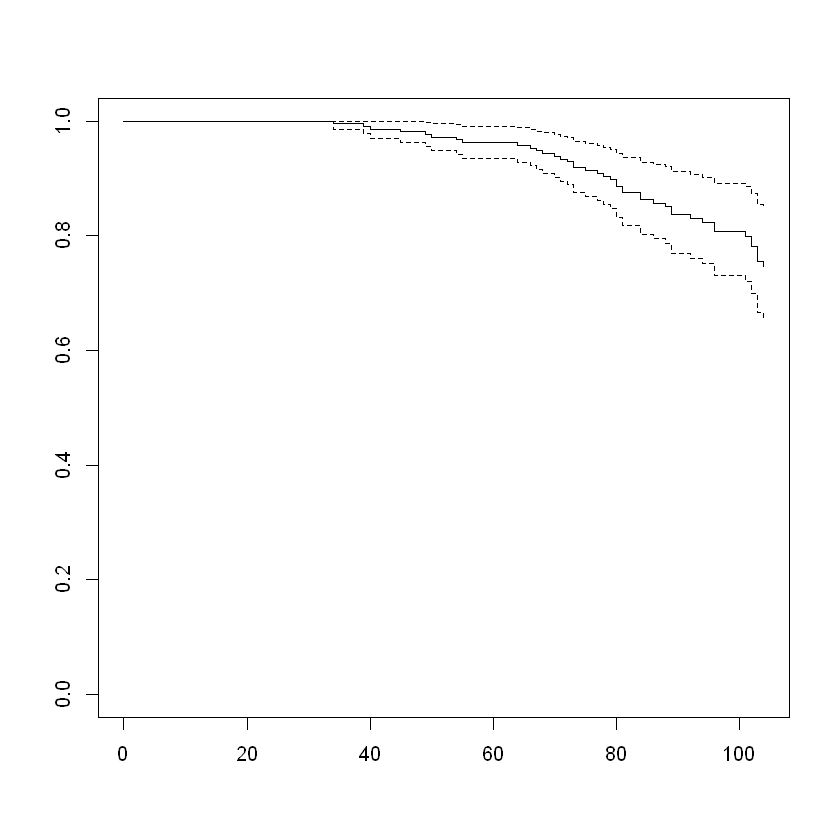

In [39]:
plot(sup)

In [40]:
summary(sup)

Call: survfit(formula = cox.rats2)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   34    298       1    0.995 0.00459        0.987        1.000
   39    297       1    0.991 0.00657        0.978        1.000
   40    295       1    0.986 0.00816        0.970        1.000
   45    294       1    0.982 0.00952        0.963        1.000
   49    292       1    0.977 0.01078        0.956        0.998
   50    290       1    0.972 0.01196        0.949        0.996
   54    285       1    0.968 0.01307        0.942        0.994
   55    282       1    0.963 0.01412        0.936        0.991
   64    274       1    0.958 0.01516        0.929        0.988
   66    271       1    0.953 0.01616        0.922        0.986
   67    270       1    0.949 0.01713        0.916        0.983
   68    267       1    0.944 0.01808        0.909        0.980
   70    263       1    0.939 0.01902        0.902        0.977
   71    261       1    0.934 0.01995        0.896        0.974
   7

**Revisando funciones de sup mediante KM**

**SEX**

In [41]:
km.sex<-survfit(rp~rats$sex)
km.sex

Call: survfit(formula = rp ~ rats$sex)

             n events median 0.95LCL 0.95UCL
rats$sex=f 150     40     NA      NA      NA
rats$sex=m 150      2     NA      NA      NA

In [42]:
summary(km.sex)

Call: survfit(formula = rp ~ rats$sex)

                rats$sex=f 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   34    150       1    0.993 0.00664        0.980        1.000
   39    149       1    0.987 0.00937        0.968        1.000
   40    148       1    0.980 0.01143        0.958        1.000
   45    147       1    0.973 0.01315        0.948        0.999
   49    145       1    0.967 0.01468        0.938        0.996
   50    143       1    0.960 0.01606        0.929        0.992
   54    142       1    0.953 0.01731        0.920        0.988
   55    141       1    0.946 0.01846        0.911        0.983
   64    138       1    0.939 0.01956        0.902        0.979
   66    137       1    0.933 0.02058        0.893        0.974
   67    136       1    0.926 0.02154        0.884        0.969
   68    135       1    0.919 0.02245        0.876        0.964
   70    132       1    0.912 0.02333        0.867        0.959
   72    130       1    0.905 0.0241

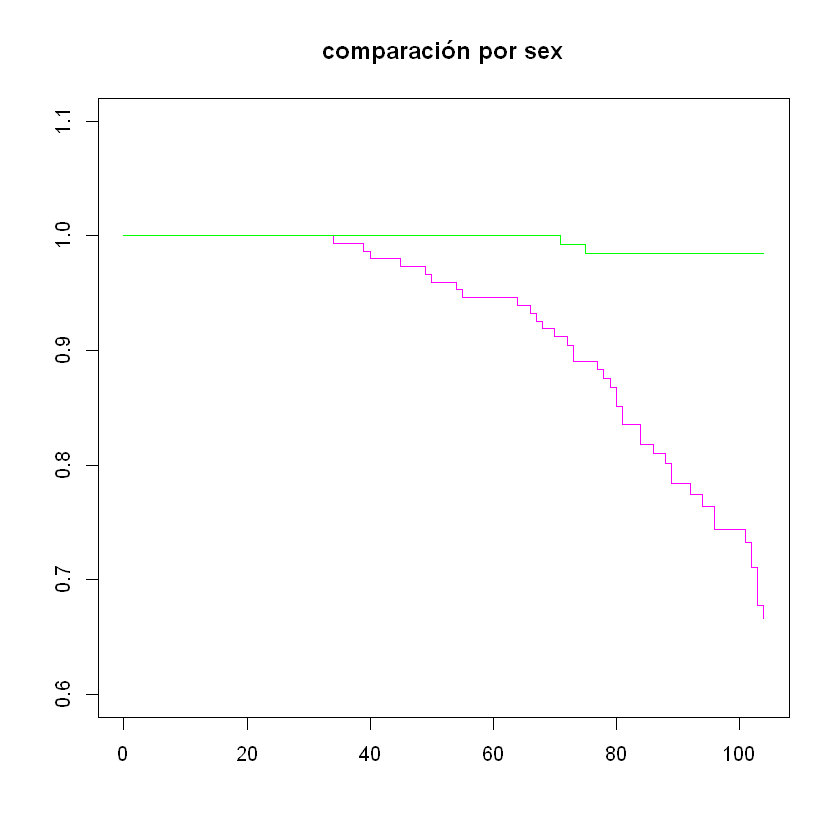

In [43]:
plot(km.sex, col=c("magenta", "green"), main="comparación por sex", ylim=c(0.6, 1.1))

In [44]:
survdiff(rp~rats$sex, rho=0)

Call:
survdiff(formula = rp ~ rats$sex, rho = 0)

             N Observed Expected (O-E)^2/E (O-E)^2/V
rats$sex=f 150       40     20.6      18.1      35.9
rats$sex=m 150        2     21.4      17.5      35.9

 Chisq= 35.9  on 1 degrees of freedom, p= 2e-09 

Dado que el p-valor es menor, por lo que las funciones difieren.
Apoyados del gráfico, las hembras son las que tienen menor supervivencia.

In [45]:
data(cancer)
#como contar los NA por columna
#como quitar los renglones, si tienen muchos NA
# que porcentajes de NA para decir quitar la columna
#rellenar los datos NA.

In [46]:
is.na(cancer)

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [47]:
sum(is.na(cancer))

[1] 67

In [48]:
sum(is.na(cancer$meal.cal))

[1] 47

In [49]:
sum(is.na(cancer$wt.loss))

[1] 14

In [50]:
sum(is.na(cancer$ph.ecog))

[1] 1

In [51]:
mean(cancer$meal.cal) #arroja NA porque hay algunas casillas que no tienen información

[1] NA

In [52]:
sum(complete.cases(cancer))

[1] 167

In [53]:
mean(cancer$meal.cal, na.rm=T) #excluye los valores na de la media

[1] 928.779

In [54]:
#eliminar de tu base de datos los casos donde tengas los valores faltantes
cancer2<-na.omit(cancer)
nrow(cancer2) #pone el numero de filas
cancer2
#lo malo es que trabajas con menos datos

[1] 167

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
2,3,455,2,68,1,0,90,90,1225,15
4,5,210,2,57,1,1,90,60,1150,11
6,12,1022,1,74,1,1,50,80,513,0
7,7,310,2,68,2,2,70,60,384,10
8,11,361,2,71,2,2,60,80,538,1
9,1,218,2,53,1,1,70,80,825,16
10,7,166,2,61,1,2,70,70,271,34
11,6,170,2,57,1,1,80,80,1025,27
15,12,567,2,57,1,1,80,70,2600,60
17,22,613,2,70,1,1,90,100,1150,-5


Cuando tenemos datos faltantes, son replanzados por:
Media- para datos numéricos
Moda-para datos categoricos

In [55]:
media_faltantes=mean(cancer$meal.cal, na.rm=T)
cancer$meal.cal[is.na(cancer$meal.cal)]=media_faltantes

In [56]:
library(missForest)

In [57]:
imp<-missForest(cancer,verbose = TRUE,variablewise = FALSE)

  missForest iteration 1 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
    estimated error(s): 0.02235581 
    difference(s): 3.038935e-06 
    time: 0.22 seconds

  missForest iteration 2 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
    estimated error(s): 0.02262376 
    difference(s): 2.550092e-07 
    time: 0.17 seconds

  missForest iteration 3 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
    estimated error(s): 0.02272829 
    difference(s): 1.6605e-07 
    time: 0.22 seconds

  missForest iteration 4 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
    estimated error(s): 0.02267439 
    difference(s): 1.620312e-07 
    time: 0.19 seconds

  missForest iteration 5 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
    estimated error(s): 0.02273807 
    difference(s): 2.169964e-07 
    time: 0.2 seconds



In [58]:
imp$OOBerror

NRMSE 
0.02267439

In [59]:
imp<-missForest(cancer,verbose = TRUE,variablewise = TRUE)
imp$OOBerror

  missForest iteration 1 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
    estimated error(s): 72.87644 0 0 0 0 0.1855528 58.13064 166.2859 0 177.4321 
    difference(s): 3.382899e-06 
    time: 0.2 seconds

  missForest iteration 2 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
    estimated error(s): 72.81263 0 0 0 0 0.1812231 60.45623 162.6621 0 175.1857 
    difference(s): 1.343952e-07 
    time: 0.19 seconds

  missForest iteration 3 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
    estimated error(s): 75.8454 0 0 0 0 0.1789423 60.66078 165.7202 0 178.7088 
    difference(s): 2.378586e-07 
    time: 0.2 seconds



MSE         MSE         MSE         MSE         MSE         MSE 
 72.8126263   0.0000000   0.0000000   0.0000000   0.0000000   0.1812231 
        MSE         MSE         MSE         MSE 
 60.4562338 162.6621163   0.0000000 175.1856670

In [60]:
dflimpio<-as.data.frame(imp$ximp)
dflimpio

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
3,306,2,74,1,1.00,90,100,1175.000,7.072
3,455,2,68,1,0.00,90,90,1225.000,15.000
3,1010,1,56,1,0.00,90,90,928.779,15.000
5,210,2,57,1,1.00,90,60,1150.000,11.000
1,883,2,60,1,0.00,100,90,928.779,0.000
12,1022,1,74,1,1.00,50,80,513.000,0.000
7,310,2,68,2,2.00,70,60,384.000,10.000
11,361,2,71,2,2.00,60,80,538.000,1.000
1,218,2,53,1,1.00,70,80,825.000,16.000
7,166,2,61,1,2.00,70,70,271.000,34.000
